In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
!unzip -u "/content/drive/MyDrive/CS 189/hw4.zip" -d /content

Archive:  /content/drive/MyDrive/CS 189/hw4.zip


In [31]:
## Locate this notebook inside data
%cd /content/hw4

/content/hw4


# CS 189
## Homework 2
### Submitted by Lan Dinh

In [32]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split

### 3. Wine Classification with Logistic Regression

#### 3.1. Batch Gradient Descent Update

In [33]:
data = scipy.io.loadmat('data.mat')

In [34]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'y', 'X', 'description', 'X_test'])

In [35]:
data['description']

array(['fixed acidity       ', 'volatile acidity    ',
       'citric acid         ', 'residual sugar      ',
       'chlorides           ', 'free sulfur dioxide ',
       'total sulfur dioxide', 'density             ',
       'pH                  ', 'sulphates           ',
       'alcohol             ', 'quality             '], dtype='<U20')

In [68]:
def normalize():
  return np.mean(X, axis = 0), np.std(X, axis = 0)
#Compute mean and standard deviation based on training data
miu_hat, sigma_hat = normalize()
def pre_process(data, miu, sigma):
  normalized = (data-miu)/sigma
  add_fictitious = np.concatenate((normalized, np.ones((normalized.shape[0],1))),axis=1)
  return add_fictitious

In [69]:
X = data['X']
y = data['y']
X_test = data['X_test']

In [70]:
X_clean = pre_process(X, miu_hat, sigma_hat)
X_test_clean = pre_process(X_test, miu_hat, sigma_hat)
X_train, X_val, y_train, y_val = train_test_split(X_clean, y, test_size = 0.2, random_state=42)

In [74]:
def compute_s(X):
  s = scipy.special.expit(X)
  return np.clip(s, 0, 0.99999999)

def compute_cost(X, w, y, lam):
  s = compute_s(X@w)
  return (-1)*np.sum((y*(np.log(s)) + (1-y)*(np.log(1-s)))) + lam*np.linalg.norm(w)

In [87]:
w_t = np.zeros((X_train.shape[1],1))
lam = 0.1
learning_rate = 0.01
cost_arr = []
num_iter = 7000
for i in np.arange(num_iter):

  grad = X_train.T @(compute_s(X_train@w_t)-y_train) + 2*lam*w_t

  cost = compute_cost(X_train, w_t, y_train, lam)
  cost_arr.append(cost)
  #update gradient
  w_t = w_t - learning_rate*grad


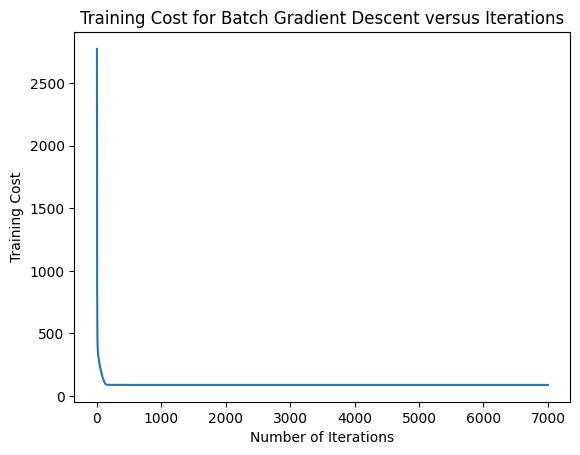

In [80]:
plt.title("Training Cost for Batch Gradient Descent versus Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Cost")
plt.plot(np.arange(num_iter), cost_arr)
plt.show()

#### 3.2 Stochastic Gradient Descent

In [96]:
## SGD
np.random.seed(42)
w_t = np.zeros((X_train.shape[1],1))
lam = 0.1
learning_rate = 0.001
cost_arr_2 = []
train_size = X_train.shape[0]
num_iter=7000
for i in np.arange(num_iter):
  indx = np.random.choice(train_size)
  xi = X_train[indx].reshape(X_train[indx].shape[0],1)
  grad = (compute_s(np.sum(xi*w_t)-y_train[indx]))*xi+ 2*lam*w_t
  cost = compute_cost(X_train, w_t, y_train, lam)

  cost_arr_2.append(cost)
  #update gradient
  w_t = w_t - learning_rate*grad

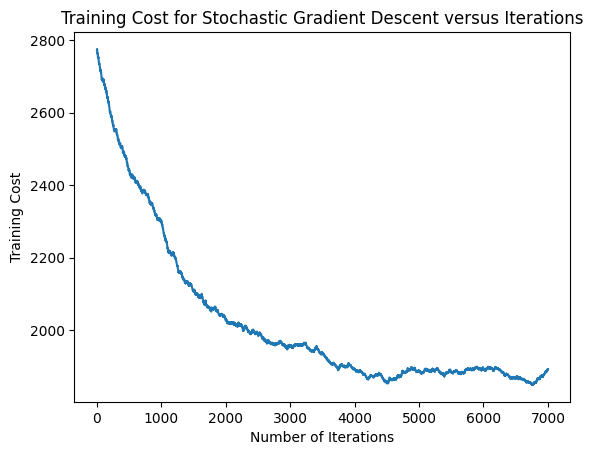

In [97]:
plt.title("Training Cost for Stochastic Gradient Descent versus Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Cost")
plt.plot(np.arange(num_iter), cost_arr_2)
plt.show()

#### 3.5. Modified Stochastic Gradient Descent

In [94]:
## Modified SGD
np.random.seed(42)
w_t = np.zeros((X_train.shape[1],1))
lam = 0.1
learning_rate = 0.1
cost_arr_3 = []
train_size = X_train.shape[0]
num_iter=7000
for i in np.arange(num_iter):
  indx = np.random.choice(train_size)
  xi = X_train[indx].reshape(X_train[indx].shape[0],1)
  grad = (compute_s(np.sum(xi*w_t)-y_train[indx]))*xi+ 2*lam*w_t
  cost = compute_cost(X_train, w_t, y_train, lam)

  cost_arr_3.append(cost)
  #update gradient and learning rate
  alpha = learning_rate/(i+1)
  w_t = w_t - alpha*grad

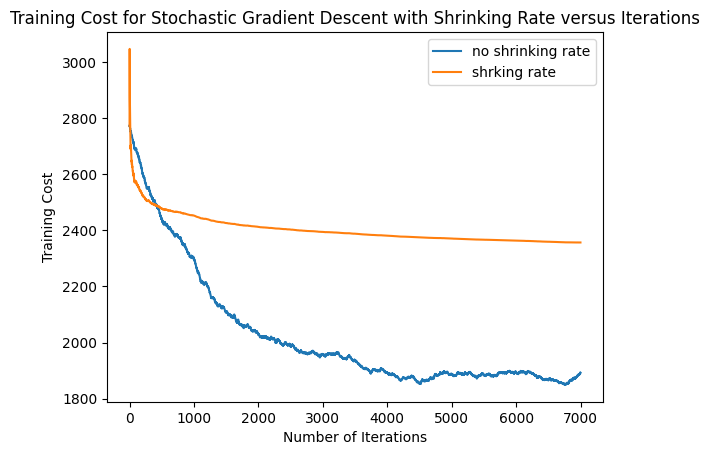

In [95]:
plt.title("Training Cost for Stochastic Gradient Descent with Shrinking Rate versus Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Training Cost")
plt.plot(np.arange(num_iter), cost_arr_2, label='no shrinking rate')
plt.plot(np.arange(num_iter), cost_arr_3, label='shrking rate')
plt.legend()
plt.show()

#### 3.6 Kaggle

In [46]:
import pandas as pd
import numpy as np

# Usage: results_to_csv(clf.predict(X_test))
def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv(f"{name}_submission.csv", index_label='Id')

In [47]:
arr = np.ones(3)

In [48]:
arr = np.append(arr,1)
arr

array([1., 1., 1., 1.])

In [49]:
columns = np.append(data['description'], 'bias')
columns

array(['fixed acidity       ', 'volatile acidity    ',
       'citric acid         ', 'residual sugar      ',
       'chlorides           ', 'free sulfur dioxide ',
       'total sulfur dioxide', 'density             ',
       'pH                  ', 'sulphates           ',
       'alcohol             ', 'quality             ', 'bias'],
      dtype='<U20')

In [50]:
df = pd.DataFrame(X_clean, columns=columns)
df.columns

Index(['fixed acidity       ', 'volatile acidity    ', 'citric acid         ',
       'residual sugar      ', 'chlorides           ', 'free sulfur dioxide ',
       'total sulfur dioxide', 'density             ', 'pH                  ',
       'sulphates           ', 'alcohol             ', 'quality             ',
       'bias'],
      dtype='object')

In [90]:
w_t = np.zeros((X_train.shape[1],1))
lams = np.arange(0.0001,0.1,0.002)
learning_rate = 0.01
cost_per_lam =[]
cost_arr_4 = []
optimal_w = []
num_iter = 1000
for lam in lams:
  for j in np.arange(num_iter):
    grad = X_train.T @(compute_s(X_train@w_t)-y_train) + 2*lam*w_t
    cost = compute_cost(X_val, w_t, y_val, lam)
    cost_arr_4.append(cost)
    w_t = w_t - learning_rate*grad
  optimal_w.append(w_t)
  cost_per_lam.append(cost_arr_4[-1])
  print("Lambda " + str(lam) + " has cost: "+ str(cost_arr_4[-1]))


Lambda 0.0001 has cost: 39.52789011225713
Lambda 0.0021 has cost: 39.518121068222555
Lambda 0.0041 has cost: 39.49368329390831
Lambda 0.0061 has cost: 39.47256171536218
Lambda 0.0081 has cost: 39.454668692850646
Lambda 0.0101 has cost: 39.43972883280866
Lambda 0.0121 has cost: 39.427495008164534
Lambda 0.0141 has cost: 39.4177464789176
Lambda 0.0161 has cost: 39.410285372039134
Lambda 0.0181 has cost: 39.404933713668214
Lambda 0.0201 has cost: 39.40153092004182
Lambda 0.022099999999999998 has cost: 39.399931678323185
Lambda 0.0241 has cost: 39.40000413366582
Lambda 0.0261 has cost: 39.40162833685137
Lambda 0.0281 has cost: 39.40469490903498
Lambda 0.0301 has cost: 39.40910388222218
Lambda 0.032100000000000004 has cost: 39.414763699433216
Lambda 0.034100000000000005 has cost: 39.421590338753546
Lambda 0.03610000000000001 has cost: 39.4295065480273
Lambda 0.0381 has cost: 39.438441173045796
Lambda 0.040100000000000004 has cost: 39.44832856586534
Lambda 0.042100000000000005 has cost: 39.4

In [91]:
map_lams = dict(zip(cost_per_lam, lams))
map_w = dict(zip(cost_per_lam, optimal_w))
optimal_cost = min(cost_per_lam)
best_lam = map_lams[optimal_cost]
best_w = map_w[optimal_cost]
best_lam, best_w


(0.022099999999999998,
 array([[-1.21223739],
        [ 1.04529254],
        [-0.73096532],
        [-5.66333471],
        [ 0.78871516],
        [ 1.05381117],
        [-3.15052334],
        [ 8.26504463],
        [-1.09033517],
        [ 0.11836305],
        [ 3.61068026],
        [ 0.47683573],
        [-4.12148806]]))

Best lambda: 0.022

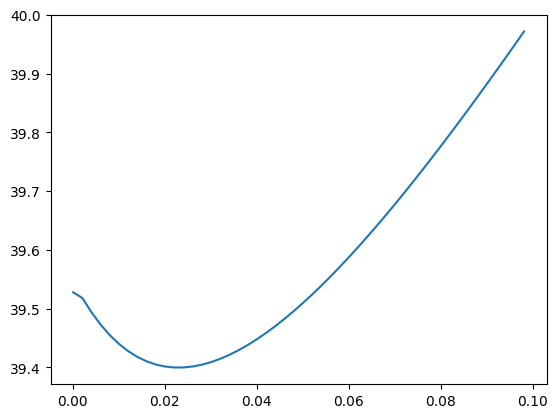

39.399931678323185

In [92]:
plt.plot(lams, cost_per_lam)
plt.show()
min(cost_per_lam)

In [56]:
y_test = compute_s(X_test_clean@best_w)
y_test = y_test.reshape(y_test.shape[0])
y_pred = np.round(y_test)
y_pred[:5], y_test[:5]

(array([0., 0., 0., 1., 0.]),
 array([1.00000000e-11, 8.47351807e-10, 1.00000000e-11, 9.99999990e-01,
        6.96238803e-10]))

In [57]:
results_to_csv(y_pred, 'wine')

### 5. ℓ1-regularization, ℓ2-regularization, and Sparsity

In [101]:
def compute_norm(w1, w2, p):
  return (np.abs(w1)**p + np.abs(w2)**p)**(1/p)

#### (a) ℓ0.5

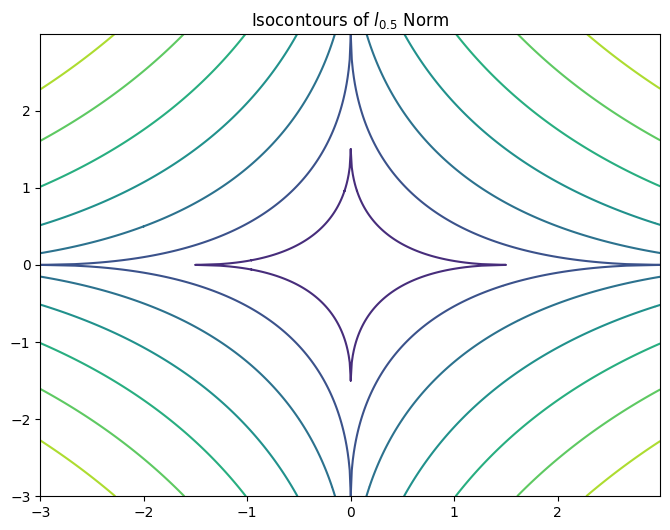

In [109]:
## l-0.5 norm
w1, w2 = np.mgrid[-3:3:.01, -3:3:.01]
norm_w = compute_norm(w1,w2,0.5)

plt.figure(figsize=(8, 6))
plt.title("Isocontours of $l_{0.5}$ Norm")
plt.contour(w1, w2, norm_w)
plt.show()

#### (b) ℓ1

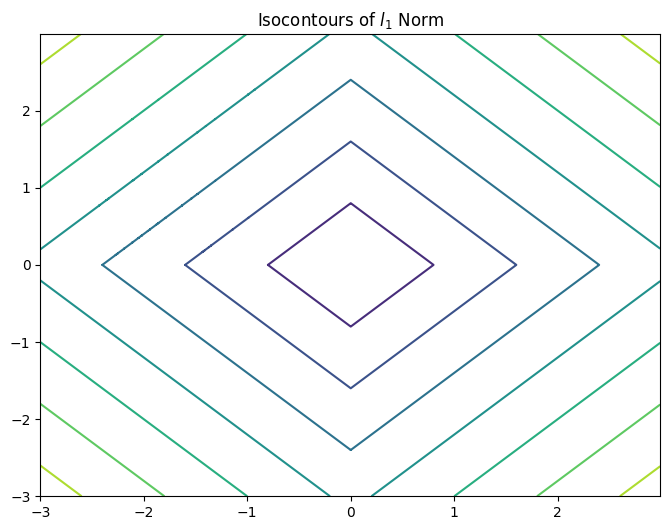

In [110]:
## l-1 norm
w1, w2 = np.mgrid[-3:3:.01, -3:3:.01]
norm_w = compute_norm(w1,w2,1)

plt.figure(figsize=(8, 6))
plt.title("Isocontours of $l_{1}$ Norm")
plt.contour(w1, w2, norm_w)
plt.show()

#### (b) ℓ2

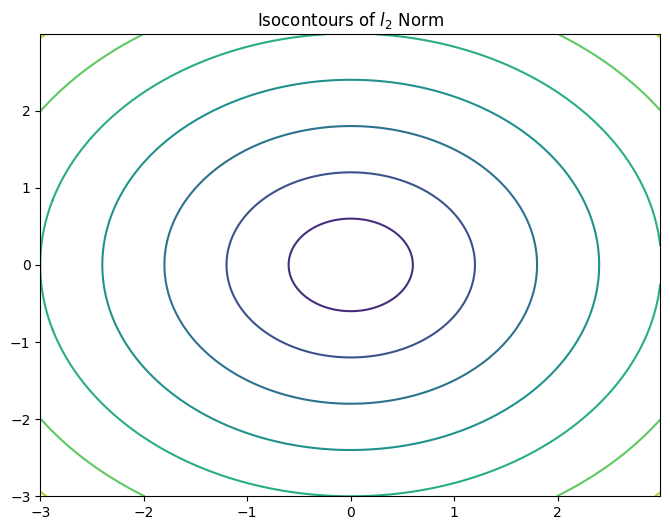

In [111]:
## l-2 norm
w1, w2 = np.mgrid[-3:3:.01, -3:3:.01]
norm_w = compute_norm(w1,w2,2)

plt.figure(figsize=(8, 6))
plt.title("Isocontours of $l_{2}$ Norm")
plt.contour(w1, w2, norm_w)
plt.show()